<a href="https://colab.research.google.com/github/aniketsharma00411/mba_placement_prediction/blob/main/salary_eda_mba_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link: https://www.kaggle.com/benroshan/factors-affecting-campus-placement

# Uploading dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class.csv


# Initialization

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Placement_Data_Full_Class.csv', index_col='sl_no').reset_index(drop=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Since there are some missing values in `salary` (target), we will remove all such rows.

In [ ]:
df = df.dropna(subset=['salary']).reset_index(drop=True)

# Splitting into training (validation included) and test sets

Early splitting will help ensure that the data used for training and validation has no information which available in the testing/final evaluation dataset.

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
1,M,74.00,Central,70.00,Central,Science,72.00,Comm&Mgmt,Yes,60.0,Mkt&Fin,57.24,Placed,260000.0
2,M,82.00,Others,61.00,Others,Science,62.00,Sci&Tech,No,89.0,Mkt&Fin,65.45,Placed,360000.0
3,M,69.60,Central,68.40,Central,Commerce,78.30,Comm&Mgmt,Yes,60.0,Mkt&Fin,63.70,Placed,250000.0
4,M,73.00,Central,73.00,Central,Science,66.00,Sci&Tech,Yes,70.0,Mkt&Fin,68.07,Placed,275000.0


# Exploratory Data Analysis (EDA)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          88 non-null     object 
 1   ssc_p           88 non-null     float64
 2   ssc_b           88 non-null     object 
 3   hsc_p           88 non-null     float64
 4   hsc_b           88 non-null     object 
 5   hsc_s           88 non-null     object 
 6   degree_p        88 non-null     float64
 7   degree_t        88 non-null     object 
 8   workex          88 non-null     object 
 9   etest_p         88 non-null     float64
 10  specialisation  88 non-null     object 
 11  mba_p           88 non-null     float64
 12  status          88 non-null     object 
 13  salary          88 non-null     float64
dtypes: float64(6), object(8)
memory usage: 9.8+ KB


In [ ]:
numerical = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
categorical = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

classification_target = ['status']
regression_target = ['salary']

## Target

In [ ]:
y = df_train[regression_target]['salary']
y.head()

0    500000.0
1    260000.0
2    360000.0
3    250000.0
4    275000.0
Name: salary, dtype: float64

In [ ]:
y.describe()

count        88.000000
mean     288136.363636
std      102719.591727
min      200000.000000
25%      240000.000000
50%      262000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

## Numerical Features

In [ ]:
df_numerical = df_train[numerical]

df_numerical.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,73.24,50.83,64.27,64.0,66.23
1,74.00,70.00,72.00,60.0,57.24
2,82.00,61.00,62.00,89.0,65.45
3,69.60,68.40,78.30,60.0,63.70
4,73.00,73.00,66.00,70.0,68.07


In [ ]:
df_numerical.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,88.000000,88.000000,88.000000,88.000000,88.000000
mean,71.808523,69.780000,68.680114,73.548977,62.370114
std,8.976618,9.279148,6.444206,14.062744,6.110641
min,49.000000,50.830000,56.000000,50.890000,52.380000
25%,65.000000,62.875000,64.575000,60.000000,57.187500
50%,72.500000,68.200000,67.700000,72.075000,61.305000
75%,79.082500,74.500000,73.000000,86.000000,66.525000
max,88.000000,97.700000,84.000000,98.000000,76.260000


### Missing Values

The training data does not have any missing values but the testing data can. So, we need to decide how to fill missing values for each feature.

The methodology used for numerical features is:
- Fill with mean if the feature has Gaussian distribution
- Fill with meadian otherwise

To find if the feature is Gaussian or not we will plot histograms of each feature.

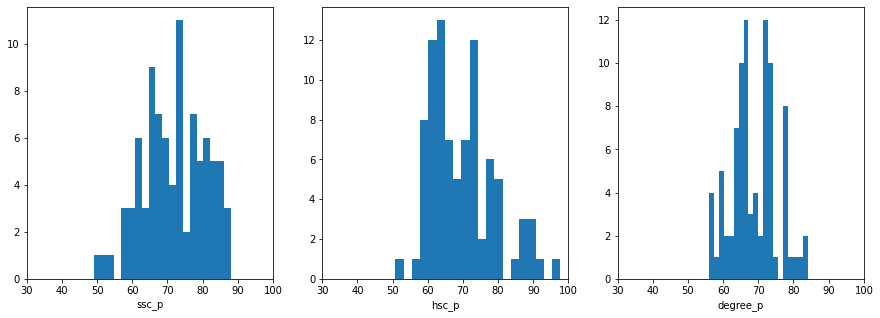

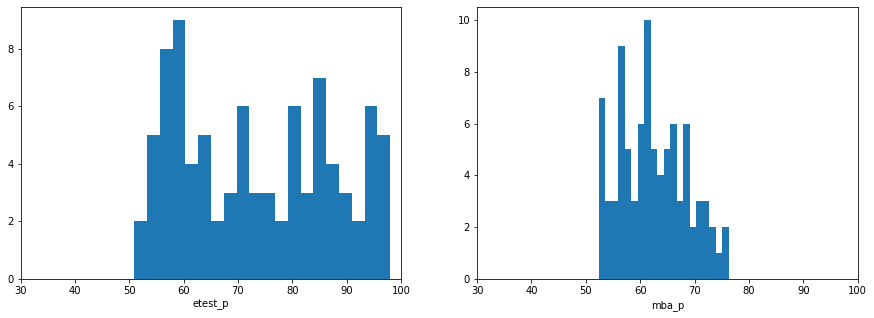

In [ ]:
_, ax1 = plt.subplots(1,3, figsize=(15,5))
for i, c in enumerate(numerical[:3]):
    ax1[i].hist(df_numerical[c], bins = 20)
    ax1[i].set_xlabel(c)
    ax1[i].set_xlim(30, 100)

_, ax2 = plt.subplots(1,2, figsize=(15,5))
for i, c in enumerate(numerical[3:]):
    ax2[i].hist(df_numerical[c], bins = 20)
    ax2[i].set_xlabel(c)
    ax2[i].set_xlim(30, 100)

plt.show()

Distribution of all the features is close to Gaussian so we will fill missing values with mean.

### Feature Redundance

Next, we will look at correlation between features to find if there are any redundant features.

We will try to find linear correlation between features using Pearson's correlation coefficient and non-linear correlation using Spearman's correlation.

For both we will plot a correlation matrix to make the result readable.

Source: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

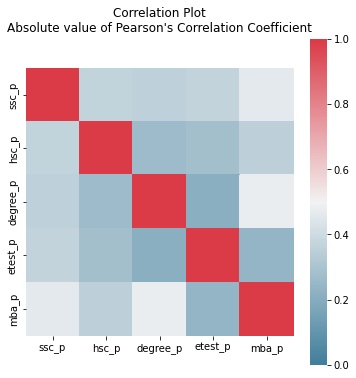

In [ ]:
pearson_corr = df_numerical.corr(method='pearson').abs()

fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Pearson's Correlation Coefficient\n\n")
sns.heatmap(pearson_corr,
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

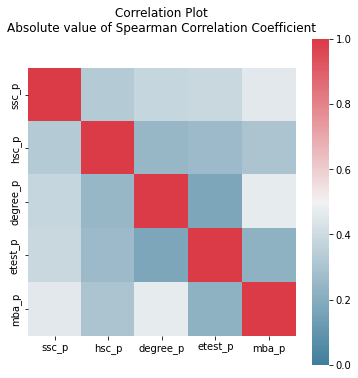

In [ ]:
spearman_corr = df_numerical.corr(method='spearman').abs()

fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Spearman Correlation Coefficient\n\n")
sns.heatmap(spearman_corr,
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

From this we can conclude that no features are redundant.

### Feature Selection

Now, we will try to find feature relevance with the target.

For this we will use Pearson's correlation coefficient and Spearman's correlation.

Source: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

In [ ]:
linear_corr = df_numerical.corrwith(y, method='pearson')
linear_corr

ssc_p      -0.010632
hsc_p      -0.062178
degree_p   -0.111723
etest_p     0.122691
mba_p       0.186409
dtype: float64

In [ ]:
non_linear_corr = df_numerical.corrwith(y, method='spearman')
non_linear_corr

ssc_p       0.122063
hsc_p       0.012582
degree_p   -0.056050
etest_p     0.226010
mba_p       0.182718
dtype: float64

The closer the value to 1 the more important the feature is in predicting the result.

Therefore, we can conclude `mba_p` is the most important numerical feature and `hsc_p` is the least important numerical feature.

If and which features to remove we will decide by training some simple linear models after removing the features one by one based on their correlation values and evaluating their scores.

## Categorical Features

In [ ]:
df_categorical = df_train[categorical]

df_categorical.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
0,M,Others,Others,Science,Sci&Tech,Yes,Mkt&Fin
1,M,Central,Central,Science,Comm&Mgmt,Yes,Mkt&Fin
2,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin
3,M,Central,Central,Commerce,Comm&Mgmt,Yes,Mkt&Fin
4,M,Central,Central,Science,Sci&Tech,Yes,Mkt&Fin


In [ ]:
df_categorical.describe()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
count,88,88,88,88,88,88,88
unique,2,2,2,3,3,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin
freq,62,47,51,47,59,51,60


In [ ]:
df_categorical_encoded = pd.get_dummies(df_categorical, drop_first=True)
df_categorical_encoded.head()

,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,1,1,1,0,1,0,1,1,0
1,1,0,0,0,1,0,0,1,0
2,1,1,1,0,1,0,1,0,0
3,1,0,0,1,0,0,0,1,0
4,1,0,0,0,1,0,1,1,0


### Missing Values

The training data does not have any missing values but the testing data can. So, we will fill the missing values with the most frequent value in the feature.

### Feature Redundance

Now, we will find redundant categorical features.

We will try to find linear correlation between features using Pearson's correlation coefficient and non-linear correlation using Spearman's correlation.

For both we will plot a correlation matrix to make the result readable.

Source: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

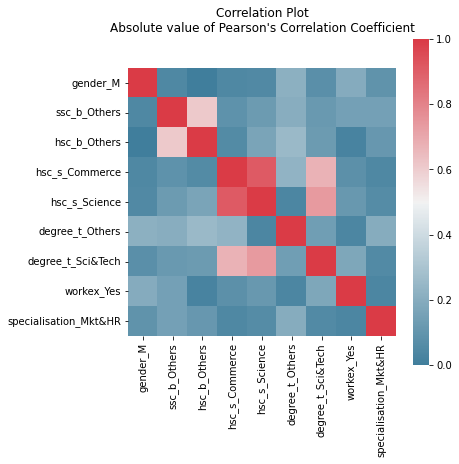

In [ ]:
pearson_corr = df_categorical_encoded.corr(method='pearson').abs()

fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Pearson's Correlation Coefficient\n\n")
sns.heatmap(pearson_corr,
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

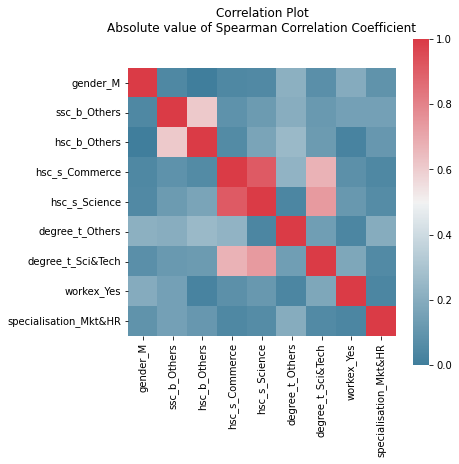

In [ ]:
spearman_corr = df_categorical_encoded.corr(method='spearman').abs()

fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Spearman Correlation Coefficient\n\n")
sns.heatmap(spearman_corr,
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

Again the correlation is not too strong between any pair of features to remove them.

Therefore, we can conclude that there are no redundant features.

### Feature Selection

Now, we will try to find feature relevance with the target.

For this we will use ANOVA F-value to find linear relationship and Kendall's $\tau$ coefficient for non-linear relationship.

Source: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

In [ ]:
anova_f_values = f_classif(df_categorical_encoded, y)[0]

linear_corr = pd.Series(anova_f_values, index=df_categorical_encoded.columns)
linear_corr

gender_M                 1.037148
ssc_b_Others             1.207842
hsc_b_Others             0.888475
hsc_s_Commerce           1.081121
hsc_s_Science            1.100439
degree_t_Others          0.691208
degree_t_Sci&Tech        1.297105
workex_Yes               1.077405
specialisation_Mkt&HR    0.747880
dtype: float32

The more the ANOVA F-value the more important the feature is in predicting the result.

In [ ]:
non_linear_corr = df_categorical_encoded.corrwith(y, method='kendall')
non_linear_corr

gender_M                 0.193896
ssc_b_Others             0.095113
hsc_b_Others             0.022593
hsc_s_Commerce           0.018189
hsc_s_Science            0.009190
degree_t_Others         -0.025409
degree_t_Sci&Tech        0.136642
workex_Yes               0.102625
specialisation_Mkt&HR   -0.092937
dtype: float64

The closer the value to 1 the more important the feature is in predicting the result.

Therefore, we can conclude `gender_M` is the most important categorical feature and `degree_t_Others` is the least important categorical feature.

If and which features to remove we will decide by training some simple linear models after removing the features one by one based on their correlation values and evaluating their scores.